In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import scipy.stats as stats
import numpy as np
import gmaps
from api_keys import g_key

In [86]:
def_df = pd.read_csv('Resources/defunciones_corte18abril.csv', parse_dates=['fec_defuncion'])
def_df.rename(columns={'fec_defuncion':'Date','edad':'Age','sexo':'Gender',
                        'estado':'state','causa':'Covid','causa_registro':'Cause',
                        'alcaldia' :'Alcaldia'
                        },inplace=True)
def_df

/home/uriel/.local/share/virtualenvs/cdmx-covid-analysis-OOKfBqux/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (5,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Age,Gender,Date,state,Covid,Cause,Alcaldia,LugarMuerte,num_consecutivo
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523
...,...,...,...,...,...,...,...,...,...
420522,73.0,Hombre,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,TLAHUAC,NaN,5
420523,75.0,Hombre,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,IZTAPALAPA,NaN,4
420524,0.0,Mujer,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,TLALPAN,NaN,3
420525,55.0,Mujer,2017-01-01,CIUDAD DE MEXICO,Otra,NaN,TLALPAN,NaN,2


In [87]:
def_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420527 entries, 0 to 420526
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Age              420362 non-null  float64       
 1   Gender           420527 non-null  object        
 2   Date             420527 non-null  datetime64[ns]
 3   state            414125 non-null  object        
 4   Covid            420527 non-null  object        
 5   Cause            190998 non-null  object        
 6   Alcaldia         277049 non-null  object        
 7   LugarMuerte      168882 non-null  object        
 8   num_consecutivo  420527 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 28.9+ MB


In [88]:
gender_grouped = def_df.groupby('Gender')
gender_df =  pd.DataFrame(gender_grouped['Date'].count())
gender_df.rename(columns={'Date':'count'},inplace=True)
gender_df['Percentage'] = gender_df['count']/gender_df['count'].sum()
gender_df.head()

,count,Percentage
Gender,,
Hombre,231548,0.550614
Indefinido,128,0.000304
Mujer,188851,0.449082


In [89]:
def_df['Month'] = def_df['Date'].dt.month
#def_df['Week'] = def_df['Date'].dt.week
def_df['Day'] = def_df['Date'].dt.dayofyear
def_df['Year'] = def_df['Date'].dt.year
def_df.head()

,Age,Gender,Date,state,Covid,Cause,Alcaldia,LugarMuerte,num_consecutivo,Month,Day,Year
0,48.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Otra,"CHOQUE SEPTICO, NEUMONIA ATIPICA, SINDROME DE ...",MIGUEL HIDALGO,Hospital,420527,4,100,2021
1,67.0,Hombre,2021-04-10,CIUDAD DE MEXICO,Covid-19 Confirmado o Sospecha,"CHOQUE SEPTICO, NEUMONIA ATIPICA POR PROBABLE ...",GUSTAVO A MADERO,Hospital,420526,4,100,2021
2,49.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"INFARTO AGUDO AL MIOCARDIO, TROMBOSIS VENOSA P...",IZTAPALAPA,Domicilio,420525,4,100,2021
3,76.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"COQUE SEPTICO, INFECCION DE VIAS URINARIAS, HI...",GUSTAVO A MADERO,Domicilio,420524,4,100,2021
4,82.0,Mujer,2021-04-10,CIUDAD DE MEXICO,Otra,"ACIDOSIS METABOLICA, CHOQUE SEPTICO, INFECCION...",AZCAPOTZALCO,Hospital,420523,4,100,2021


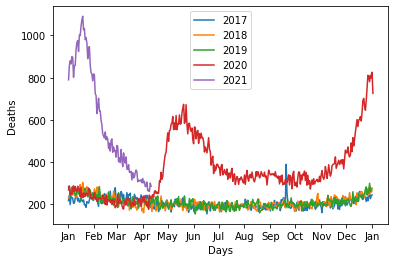

In [90]:

fig, ax = plt.subplots()
for year in range(2017,2022):

    temp = pd.DataFrame( def_df[def_df['Year']==year].groupby('Date').count()['Year']).reset_index()
    temp['Day'] = temp['Date'].dt.dayofyear
    temp

    ax.plot(temp['Day'],temp['Year'],label = year)
ax.legend()
month_ticks = mdates.MonthLocator()
ax.xaxis.set_major_locator(month_ticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
fig.savefig('Images/dethsByYear.jpg', bbox_inches='tight')
fig.show()


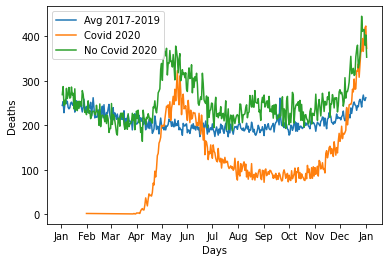

In [91]:
day_grouped = def_df.groupby(['Year','Day']).count()
avg_past_year=(day_grouped['Date'].loc[2017].values+day_grouped['Date'].loc[2018].values+day_grouped['Date'].loc[2019].values)/3
covid_2020 = def_df[(def_df['Covid'] != 'Otra')&(def_df['Year'] == 2020)]
no_covid_2020 = def_df[(def_df['Covid'] == 'Otra')&(def_df['Year'] == 2020)]

fig, ax = plt.subplots()
ax.plot(range(1,366),avg_past_year,label = 'Avg 2017-2019')
ax.plot(covid_2020.groupby(['Day']).count()['Date'], label = 'Covid 2020')
ax.plot(no_covid_2020.groupby(['Day']).count()['Date'], label = 'No Covid 2020')
ax.legend()
month_ticks = mdates.MonthLocator()
ax.xaxis.set_major_locator(month_ticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
fig.savefig('Images/dethsByYear.jpg', bbox_inches='tight')
fig.show()


In [92]:
ncausa_registro = no_covid_2020['Cause'].nunique()
total_entries = len(no_covid_2020)
print(f'Number unique Causes: {ncausa_registro} of total: {total_entries}')

Number unique Causes: 58462 of total: 92652


In [93]:
num_nan_2020 = no_covid_2020.isnull().values.sum()
print(f'Number of entries without Cause: {num_nan_2020}')
no_covid_2020 = no_covid_2020.dropna()

Number of entries without Cause: 35332


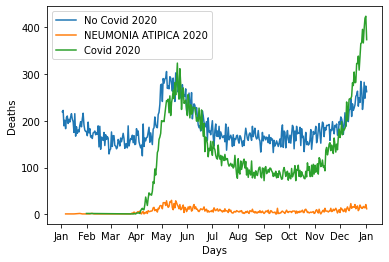

In [94]:
NA_df = no_covid_2020[no_covid_2020['Cause'].str.contains('NEUMONIA ATIPICA')]
fig, ax = plt.subplots()
ax.plot(no_covid_2020.groupby(['Day']).count()['Date'], label = 'No Covid 2020')
ax.plot(NA_df.groupby(['Day']).count()['Date'], label = 'NEUMONIA ATIPICA 2020')
ax.plot(covid_2020.groupby(['Day']).count()['Date'], label = 'Covid 2020')
ax.legend()
month_ticks = mdates.MonthLocator()
ax.xaxis.set_major_locator(month_ticks)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
ax.set_xlabel('Days')
ax.set_ylabel('Deaths')
fig.savefig('Images/NeumoniaAtipicaVSall.jpg', bbox_inches='tight')
fig.show()

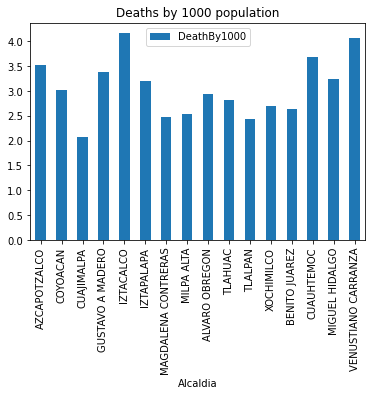

In [95]:
pop = pd.read_csv('Resources/cdmx_poblacion.csv')
alc_grouped = pd.DataFrame(covid_2020.groupby('Alcaldia').count()['Date']).reset_index()
pop = pop.merge(alc_grouped,on='Alcaldia')
pop['DeathBy1000']=(pop['Date']/pop['Poblacion'])*1000
pop.plot(kind='bar',x='Alcaldia',y='DeathBy1000')
plt.xticks(rotation=90)
plt.title('Deaths by 1000 population')
plt.savefig('Images/DeathsbyAlc.jpg', bbox_inches='tight')



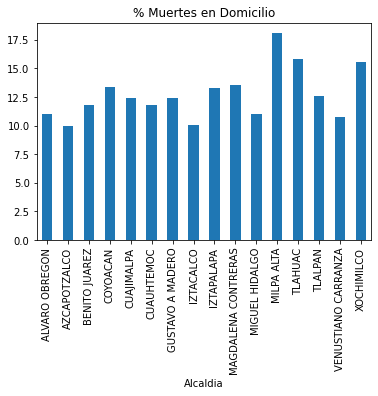

In [96]:
alc_df = pd.DataFrame(covid_2020.groupby('Alcaldia').count()['Date'])
lm_alc_grouped = covid_2020.groupby(['LugarMuerte','Alcaldia']).count()['Date']
alc_df['HomeDeaths'] = (lm_alc_grouped.loc['Domicilio']*100)/alc_df['Date']
alc_df['HomeDeaths'].plot(kind='bar')
plt.title('% Muertes en Domicilio')
plt.savefig('Images/DeathsAtHome.jpg', bbox_inches='tight')
plt.show()

In [97]:
loc_alcaldias = pd.read_csv('Resources/alcaldias.csv')
loc_alcaldias[['Lat','Lng']] = loc_alcaldias['geo_point_2d'].str.split(',',expand = True).astype(float)
loc_alcaldias = loc_alcaldias[['nomgeo','Lat','Lng']]

In [98]:
gmaps.configure(api_key=g_key)
fig = gmaps.figure()
info_box_template = """
<dl>
<dt>Alcaldia</dt><dd>{Alcaldia}</dd>
<dt>Poblacion</dt><dd>{Poblacion}</dd>
<dt>Death %</dt><dd>{death %}</dd>
</dl>
"""
HomeDeaths = [f'Deaths by 1000 persons:\n {row["DeathBy1000"]}' for index, row in pop.iterrows()]
HomeDeaths
markers = gmaps.marker_layer(loc_alcaldias[['Lat','Lng']],info_box_content=HomeDeaths)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [116]:
chisqrt = pd.DataFrame(no_covid_2020.groupby(['Month']).count()['Date'])
chisqrt['Date']= chisqrt['Date']
month_grouped = def_df.groupby(['Year','Month']).count()
avg_past_year=(month_grouped['Date'].loc[2017].values+month_grouped['Date'].loc[2018].values+month_grouped['Date'].loc[2019].values)/3
chisqrt['avg_past_year'] = (avg_past_year*chisqrt['Date'].sum())/avg_past_year.sum()
critical_value = stats.chi2.ppf(q= 0.95,df=11)
print(f'Critical Value: {critical_value}')
stats.chisquare(chisqrt['Date'],chisqrt['avg_past_year'])


Critical Value: 19.67513757268249


Power_divergenceResult(statistic=2299.064734434818, pvalue=0.0)

In [117]:
chisqrt

,Date,avg_past_year
Month,,
1,6010,6760.868211
2,4798,5809.426956
3,4871,5971.329996
4,5483,5454.015493
5,8395,5511.262977
6,6102,5191.034864
7,5137,5289.428977
8,5103,5311.194948
9,4775,5404.818437
